Assignment 4
============

Name : Nihar Kanungo
Batch : 6:30 AM , Monday


**Background :**
- - - - - - - -
This is a simple Image Recognition program which makes use of the MNIST preprocessed dataset to process the handwritten digit images and predict the numerical digit each image resents . The Code uses one of the most popular Tensorflow API Keras to perform the operations .It's a supervised Computer Vision problem.

There are 4 different networks defined in this file . Each network defined in this file is an improvement over it's Predecessor. 

Network -1 : This is the Basic Network which defines the template over which the improvements will be added .

Network -2 : This Network adds an additional functionality called " Batch Normalization " on top of Network-1

Network -3 : This Network adds an additional functionality called " Dropout " on top of Network-2

Network -4 : This Network adds variable learning rate to each epoch of the network -3 



**Input**
- - - -
1) 60000 Handwritten digit images (between 0-9)

2) The Images are already segreegated as Train and Test Data with the respective target values


**Environment**
- - - - - - - - 

    Development - Colab GPU , Jupyter Notebook
    Repository : Github

**Algorithm**
- - - - - - 
    Linear Model 
    Convolutional Neural Network (2D) - Gray Scale images
    Maxpooling 
    Softmax Activation function
    loss Function : Categorical Crossentropy
    Optimizer=Adam
    Metrics=accuracy
    Batch Normalization
    Drop Out 


**Parameters**
- - - - - - ---------------------

    Batch Size - Variable 
    Epochs - Variable
    Kernel Size - Variable (Advisable to use 3 * 3)
    Number of Kernels - Variable 
    Learning Rate

**Conditions**
- - - - - -

1. The Number of parameters < 15,000
2. Should use only Conv2D
3. Should not have applied Maxpooling before 2-4 layers of the conversion into number of classes (10 in this case)
4. Maxpooling should be applied on receptive field of at least 5 x 5 or 7 x 7
5. Activation function should be relu on conv 2D
6. With < 15 EPochs

**Expected Result**

- - - - - - - - -
To get >= 99.4 % accuracy 




# **Import Libraries and modules**

Import Libraries (Keras, Numpy) and 
       modules (Keras - Sequential, Dense, Dropout,Activation , Flatten) and
       Dataset (mnist)

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

1. Print the shape of the Training Dataset (Number of Images, Size of the images)
2. Import one of the popular library to plot charts/graphs and command to display it inline
3. Code to show the data

(60000, 28, 28)


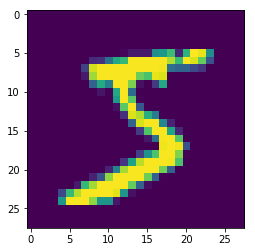

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

Reshape the Training and test data to gray scale

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

1. Convert the Images into float32 format
2. Divide the values by 255 to make it with in 0-1 (Standardize)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Display the first 10 values of the target variable (Train)

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Display the Target variable after it's one hot encoded

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

***The Core Setup***
=====================
This core setup is going to be the basic framework . All the future codes will be improvements over this code but the basic setup will be unaltered . This would help us to understand the impact of each feature on our network. The Core setup is described below.

1. Import the Activation layer 
2. Declare the Sequential model
3. Add multiple convolution layers to increase the receptive field ( 3 x 3 kernels)
4. Add Maxpooling to reduce the image size and increase the receptive field 
5. Add a large kernel of size 5 x 5 at this stage as going below this may not show significant details of the images
6. Flatten the data to make it 1D 
7. Apply Softmax on each output to find out the predicted class



In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(24, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(8, 1, 1, activation='relu'))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(24, 3, 3, activation='relu'))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launc

Display the Summary of the Model. This would give the detail parameters each layer uses . This would be a great information to find out how the memory will be used and where are oppertunities for fine tuning.

 The Total parameters used for this network is < 15000

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 22, 22, 24)        3480      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 24)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 11, 11, 8)         200       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 9, 9, 16)          1168      
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 7, 7, 16)          2320      
__________

Compile the Model with the following parameters before it can be trained 
------------------------------------------------------------------------------------------------
loss Function : Categorical Crossentropy

Optimizer=Adam ( SGD is the best optimizer , however we will see the usage of it in later stages)

Metrics=accuracy

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

W0810 15:53:52.581322 140172777031552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0810 15:53:52.616950 140172777031552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



The Training Phase of the network
-------------------------------------------

1. Fit the Model with training data 
2. Compare the output with target variable and find out the accuracy
3. Calculate the Validation accuracy at each epoch and adjust the weights from validation results 
4. Run the Model with batch size of 32 ( Higher batch size increases the speed of training , however we will use 32 for this usecase)
5. Run the model for 15 cycles over the training sample 
6. Define verbose parameter for display lines



In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=15, verbose=1,validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0810 15:53:52.800885 140172777031552 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0810 15:53:52.934099 140172777031552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 32s 529us/step - loss: 0.2238 - acc: 0.9296 - val_loss: 0.0747 - val_acc: 0.9765
Epoch 2/15
60000/60000 [==============================] - 26s 432us/step - loss: 0.0750 - acc: 0.9775 - val_loss: 0.0528 - val_acc: 0.9830
Epoch 3/15
60000/60000 [==============================] - 26s 439us/step - loss: 0.0566 - acc: 0.9824 - val_loss: 0.0479 - val_acc: 0.9845
Epoch 4/15
60000/60000 [==============================] - 26s 436us/step - loss: 0.0483 - acc: 0.9849 - val_loss: 0.0498 - val_acc: 0.9848
Epoch 5/15
60000/60000 [==============================] - 26s 435us/step - loss: 0.0408 - acc: 0.9871 - val_loss: 0.0371 - val_acc: 0.9882
Epoch 6/15
60000/60000 [==============================] - 26s 431us/step - loss: 0.0357 - acc: 0.9883 - val_loss: 0.0358 - val_acc: 0.9873
Epoch 7/15
60000/60000 [==============================] - 26s 433us/step - loss: 0.0326 - acc: 0.9895 - val_loss: 0.

Print the Test Score of the last epoch 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)


[0.04376501578187672, 0.9887]


Define a variable to store the predicted test values 

Print the Predicted value and actual value for the first 9 test sample. This is basically to visualize how it looks



In [0]:
y_pred = model.predict(X_test)
print(y_pred[:9])
print(y_test[:9])

[[1.79540546e-13 1.02655150e-11 3.23662057e-08 1.02171605e-09
  4.82984052e-12 2.44637470e-12 1.71174612e-22 1.00000000e+00
  5.77865811e-11 2.74899108e-08]
 [1.37080708e-10 3.56518868e-08 9.99999881e-01 4.45560637e-08
  7.97050248e-09 3.89434361e-12 6.72055052e-08 1.75540277e-11
  2.34534347e-08 6.70795410e-14]
 [1.40696794e-11 9.99985218e-01 1.06105325e-07 5.79933379e-10
  1.03231162e-06 2.79675200e-10 5.24114308e-09 1.35058890e-05
  7.02166005e-08 1.15986065e-09]
 [9.99944210e-01 7.09811929e-13 8.74305712e-08 3.52322928e-11
  1.15180248e-08 1.76408705e-07 1.40780157e-05 2.37323778e-08
  9.55940216e-09 4.13616544e-05]
 [1.32241034e-17 1.90357526e-15 3.53359334e-12 8.34698495e-19
  1.00000000e+00 3.35803532e-17 7.48222087e-18 1.33848799e-14
  2.53393951e-15 1.90337524e-12]
 [3.99819636e-13 9.99995232e-01 2.13793044e-07 3.10637301e-12
  2.02615979e-06 6.94282618e-11 9.69201941e-10 2.44782200e-06
  5.44638279e-10 5.82795645e-10]
 [2.86096032e-17 5.31376315e-07 3.34267058e-10 1.43203435e

In [2]:
from IPython.display import Image

Observations
--------------
Let's now analyze the outcome of the basic network . 


![](images/N1_Loss.png)

1. The Loss curve shows that the training loss is constantly decreasing in every iteration . However the validation loss increased after 8th iteration . This gives an indication of overfitting . Now let's analyze the accuracy curve to see if our assumption is correct 
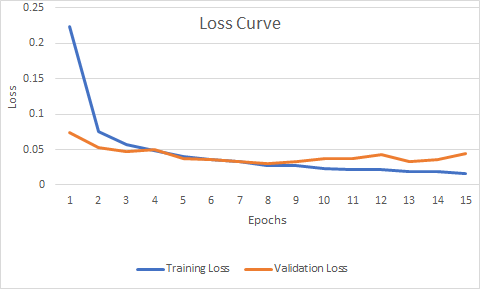

![](images/N1_Accuracy.png)

2. The accuracy curve shows a higher accuracy for training data , but the validation accuracy is not much as compared to the training data . Even though we attain validation accuracy of over 99.15% in one of the epochs but the difference between the training and validation accuracy is more than normal. this confirms our assumption to a greater extent . 

So we can conclude that the model is overfitting and hence it's not great for generalization. So we should think of some other way to make it a better fit . One thing that we can try adding is Batch Normalization . The reasons for considering Batch normalization as the first change to our network are
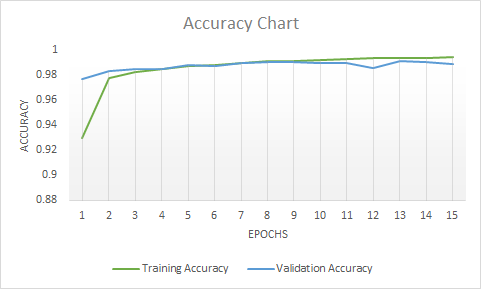

![](images/BN1.png)

BN reduces Covariate Shift. That is the change in distribution of activation of a component. By using BN, each neuron's activation becomes (more or less) a gaussian distribution, i.e. its usually not active, sometimes a bit active, rare very active.
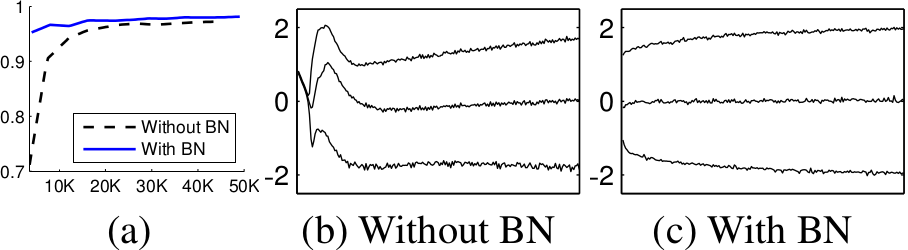

![](images/BN_formula.png)

BN reduces effects of exploding and vanishing gradients, because every becomes roughly normal distributed. Without BN, low activations of one layer can lead to lower activations in the next layer, and then even lower ones in the next layer ....
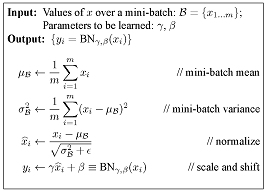

In [0]:
# from keras.layers import Activation
from keras.layers import BatchNormalization
model = Sequential()

 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Convolution2D(14, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(24, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(8, 1, 1, activation='relu'))
#model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(24, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(10, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))


model.summary()


model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, nb_epoch=15, verbose=1,validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)


y_pred = model.predict(X_test)
print(y_pred[:9])
print(y_test[:9])







/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
W0810 16:00:29.933172 140172777031552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), activation="relu")`
  if sys.path[0] == '

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 24, 24, 14)        1022      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 14)        56        
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 22, 22, 24)        3048      
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 24)        96        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 24)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 44s 740us/step - loss: 0.1910 - acc: 0.9417 - val_loss: 0.0507 - val_acc: 0.9828
Epoch 2/15
60000/60000 [==============================] - 42s 703us/step - loss: 0.0535 - acc: 0.9832 - val_loss: 0.0456 - val_acc: 0.9841
Epoch 3/15
60000/60000 [==============================] - 42s 699us/step - loss: 0.0420 - acc: 0.9867 - val_loss: 0.0341 - val_acc: 0.9892
Epoch 4/15
60000/60000 [==============================] - 42s 699us/step - loss: 0.0350 - acc: 0.9885 - val_loss: 0.0365 - val_acc: 0.9886
Epoch 5/15
60000/60000 [==============================] - 42s 696us/step - loss: 0.0301 - acc: 0.9901 - val_loss: 0.0444 - val_acc: 0.9851
Epoch 6/15
60000/60000 [==============================] - 42s 699us/step - loss: 0.0271 - acc: 0.9910 - val_loss: 0.0349 - val_acc: 0.9893
Epoch 7/15
60000/60000 [==============================] - 42s 703us/step - loss: 0.0238 - acc: 0.9919 - val_loss: 0.

Observations
------------------------
Let's now analyze the effect of Batch Normalization to out network. In this case we have added a small percentage of batch normalization after every convolution step.


![](images/N2_Loss.png)

The Loss curve shows that the training loss and validation loss both decreases constantly , however the validation loss is more than the training loss . That means we haven't been able to reduce the effect of overfitting completely . The Model is still not generalizing well. Let's see how the accuracy stands and how close this is to our target .
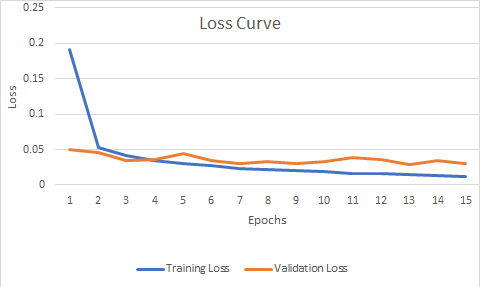

![](images/N2_Accuracy.png)

The accuracy curve shows that on the 10th Epoch our accuracy was above 99.2% but still below the target . At the same time we can still see that the difference between the training and validation accuracy is still high . So our job is not yet over . We need to think of some other alternative /addition on how to generalize the network and get a high validation accuracy.
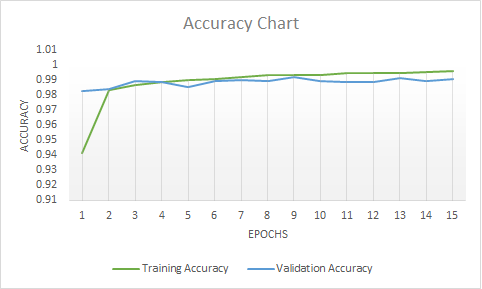




![](images/Dropout.png)



One of the most trusted ways of reducing the overfitting is to drop out some of the training samples so that the network takes hard steps to find out other features to predict the class output . The drop out normally is considered as a fraction of the training samples. Here we will consider a small amount of drop out after every convolution steps . One of the logic behind drop out to help reduce overfitting somes from the fact that during training, for each image, feature detectors are deleted with probability q = 1 − p = 0.5 and the remaining weights are trained by backpropagation. So this reduces the Dependency to improve generalization . Let's see how in helps us to generalize the effect of over fitting.
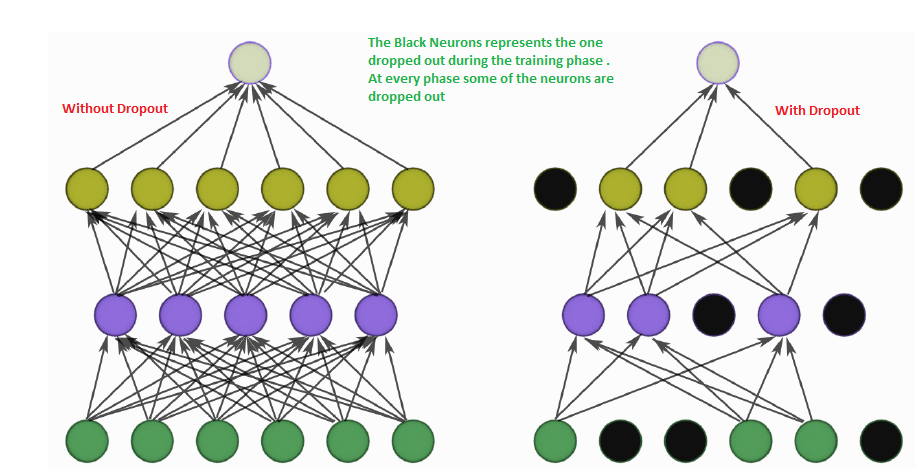

In [0]:
# from keras.layers import Activation
#from keras.layers import BatchNormalization
model = Sequential()

 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(14, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(24, 3, 3, activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(8, 1, 1, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.1))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(24, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))


model.summary()


model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, nb_epoch=15, verbose=1,validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)


y_pred = model.predict(X_test)
print(y_pred[:9])
print(y_test[:9])



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
W0810 16:11:19.561103 140172777031552 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stu

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 24, 24, 14)        1022      
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 14)        56        
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 14)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 22, 22, 24)        3048      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 47s 784us/step - loss: 0.2488 - acc: 0.9229 - val_loss: 0.0625 - val_acc: 0.9803
Epoch 2/15
60000/60000 [==============================] - 45s 745us/step - loss: 0.0802 - acc: 0.9755 - val_loss: 0.0449 - val_acc: 0.9866
Epoch 3/15
60000/60000 [==============================] - 45s 746us/step - loss: 0.0604 - acc: 0.9809 - val_loss: 0.0435 - val_acc: 0.9858
Epoch 4/15
60000/60000 [==============================] - 45s 749us/step - loss: 0.0533 - acc: 0.9836 - val_loss: 0.0326 - val_acc: 0.9894
Epoch 5/15
60000/60000 [==============================] - 45s 749us/step - loss: 0.0462 - acc: 0.9857 - val_loss: 0.0307 - val_acc: 0.9908
Epoch 6/15
60000/60000 [==============================] - 45s 749us/step - loss: 0.0426 - acc: 0.9869 - val_loss: 0.0400 - val_acc: 0.9879
Epoch 7/15
60000/60000 [==============================] - 45s 750us/step - loss: 0.0396 - acc: 0.9872 - val_loss: 0.

Observations
----------------------
Did you observe the behaviour of the network ? Let's see pictorially how it behaved .

![](images/N3_Loss.png)

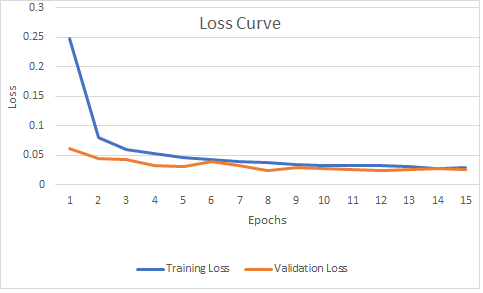

![](images/N3_Accuracy.png)


Both the Loss curve and Accuracy curve shows great improvements over the last network . The Validation loss is below the training loss and the validation accuracy is over the training accuracy . At the same time the difference between the training and validation accuracy is narrow . This looks like a great network. However we still could not achieve the magic number 99.4 . What could be the reason ? 

1. One reason i could think of is that the total number of iterations are little less . We may try to run it for 20-25 epochs and let the network do more optimization to it's weights . ( We will try this little later , for now let's focus to achieve with < 15 epochs)
2. May be the random weights are little bad and running it for few more times may achieve the target 

However our job was to achieve the target with less than 15 epochs . So it's worth thinking if something else can help us here , something which is logically correct to be used at this stage .  Did you guess it ? 
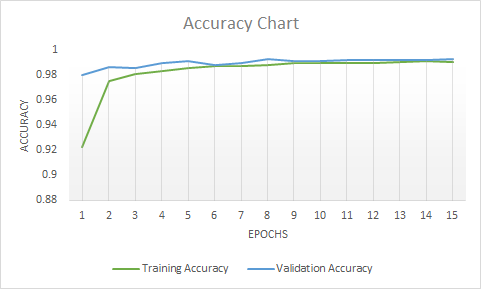

Yes we are talking about how the weights are optimized and what's the rate of optimization ? This brings us to think about how the optimizer learns to change the weights . The most important factor is the learning rate here which is the default one we have taken so far . The Networks are very much sensitive towards the learning rate changes .

![](images/LR.png)

High Learning Rate - The algorithm may oscillate and become unstable
Low Learning Rate -  The algorithm will take too long to converge



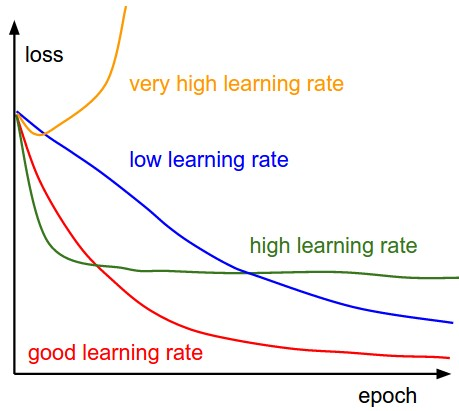


It is not practical to determine the optimal setting for the learning rate before training, and, in fact, the optimal learning rate changes during the training process, as the algorithm moves across the performance surface.The performance of the steepest descent algorithm can be improved if we allow the learning rate to change during the training process. 

![](images/LR_formula.png)

So let's add a scheduler to modify the learning rate everytime to change the fractions in the previous learning rate . This should hopefully generalize our model to a greater extent and help us achieve the target with very few training epochs and time .

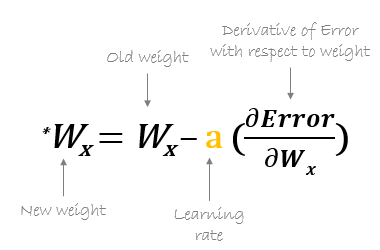

In [0]:
# from keras.layers import Activation
#from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
model = Sequential()

 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(14, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(24, 3, 3, activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(8, 1, 1, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.1))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(24, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))


model.summary()


def scheduler(epoch, lr):
    return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, epochs=15, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])


score = model.evaluate(X_test, Y_test, verbose=0)
print(score)


y_pred = model.predict(X_test)
print(y_pred[:9])
print(y_test[:9])



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_14 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_7 (Dropout)          (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 24, 24, 14)        1022      
_________________________________________________________________
batch_normalization_15 (Batc (None, 24, 24, 14)        56        
_________________________________________________________________
dropout_8 (Dropout)          (None, 24, 24, 14)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 22, 22, 24)        3048      
__________

Observations
---------------------


At the first look the results looks good. But did you also observe that we achieved the magic number as well ? If you haven't then go back and see that we achieved it in the 12th Epoch and improved over it on the 15th one . We can also try to see if more number of epochs takes it further up. But before that let's try and focus on the charts to see how it improved over different epochs and how the loss did .

![image.png](images/N4_Loss.png)

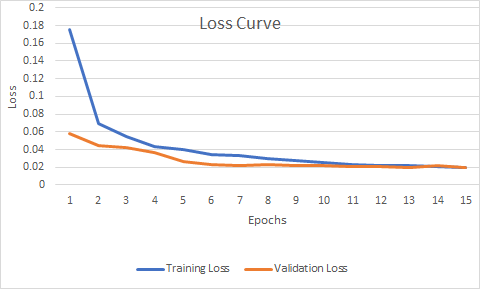

![](images/N4_Accuracy.png)


This shows that 

1. The validation loss was always better than the Training loss and 
2. Simillarly the validation accuracy was always higher than the training accuracy
3. The network also narrowed down the difference between the training and validation accuracies 

That means it did a great job in generalizing the data . We achieved the target with 

1. Less than 15000 Parameters 
2. Less than 15 epochs
3. WIth no greater than 32 batch size


Next Steps
-----------------

We can try the following as the next steps 

1. Try to achieve the magic number by improving the number of epochs without learning rate 
2. Try to get a much higher accuracy by using variable learning rate and little more epochs
3. Analyze the effect of higher dropout percentage 
4. Analyze the effect of higher learning rate
5. Analyze the effect of using more number of epochs ( 50 and above )


We will try to conclude this exercise here as we met our objective . But neverthless we will try again to improve the performance by tuning the parameters . So stay tuned !


* **************************************************************************   Prepared by Nihar Kanungo *********************************************************
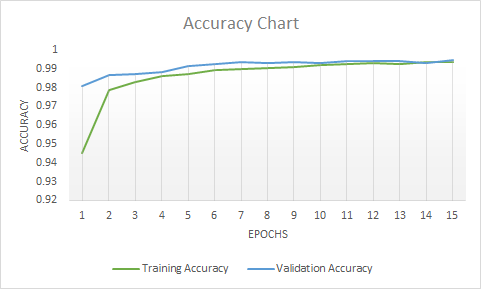